In [108]:
import re
import pandas
import matplotlib
from matplotlib import pyplot as plt
from datasets.utils import TMP_DIR

In [109]:
df = pandas.read_json('./grammy_winners.json')

In [110]:
df = df.sort_values('year')

In [111]:
df.head(n=5)

,year,subtitle,category,artist,song_or_album,url,winner
381,1958,1St Annual Grammy Awards,"Best Performance, Documentary Or Spoken Word",,The Lady From Philadelphia (Album),https://www.grammy.com/awards/1st-annual-gramm...,False
380,1958,1St Annual Grammy Awards,"Best Performance, Documentary Or Spoken Word",Stan Freberg,The Best Of The Stan Freberg Shows,https://www.grammy.com/awards/1st-annual-gramm...,True
379,1958,1St Annual Grammy Awards,"Best Sound Track Album, Dramatic Picture Score...",,I Want To Live (Album),https://www.grammy.com/awards/1st-annual-gramm...,False
378,1958,1St Annual Grammy Awards,"Best Sound Track Album, Dramatic Picture Score...",,South Pacific (Original Soundtrack),https://www.grammy.com/awards/1st-annual-gramm...,False
377,1958,1St Annual Grammy Awards,"Best Sound Track Album, Dramatic Picture Score...",,The Bridge On The River Kwai (Album),https://www.grammy.com/awards/1st-annual-gramm...,False


In [112]:
grouping = df.groupby('year')['year'].count()

In [113]:
grouping

year
1958    147
1959    172
1960    241
1961    202
1962    240
       ... 
2020    434
2021    467
2022    486
2023    490
2024    497
Name: year, Length: 67, dtype: int64

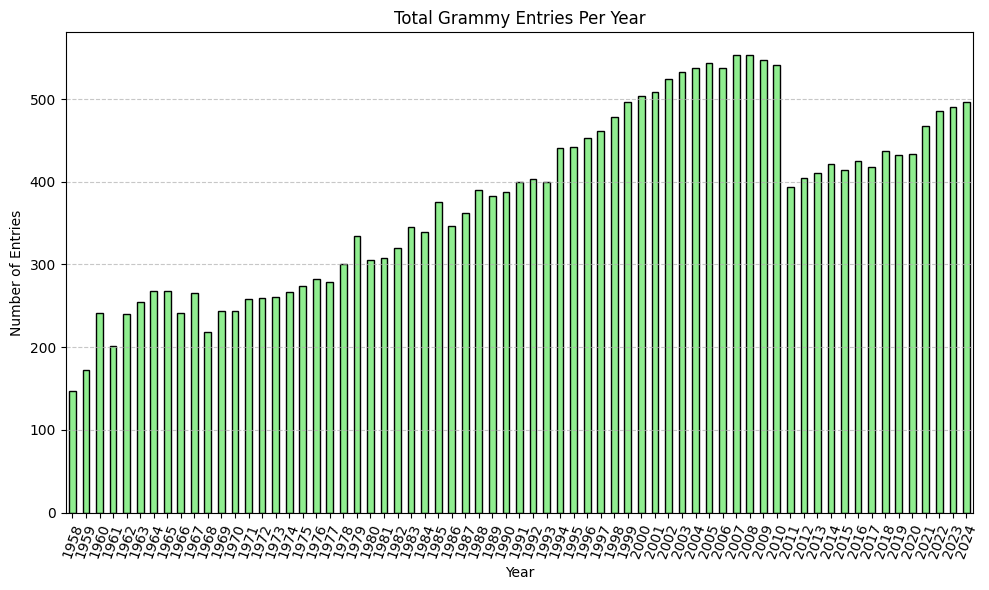

In [114]:
plt.figure(figsize=(10, 6))
grouping.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Total Grammy Entries Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [115]:
category_df = df.drop_duplicates(subset=['category'])
category_by_year = category_df.groupby('year')['category'].count()
category_by_year

year
1958    28
1959    18
1960    24
1961    29
1962    11
        ..
2020     5
2021     4
2022     7
2023     5
2024     1
Name: category, Length: 66, dtype: int64

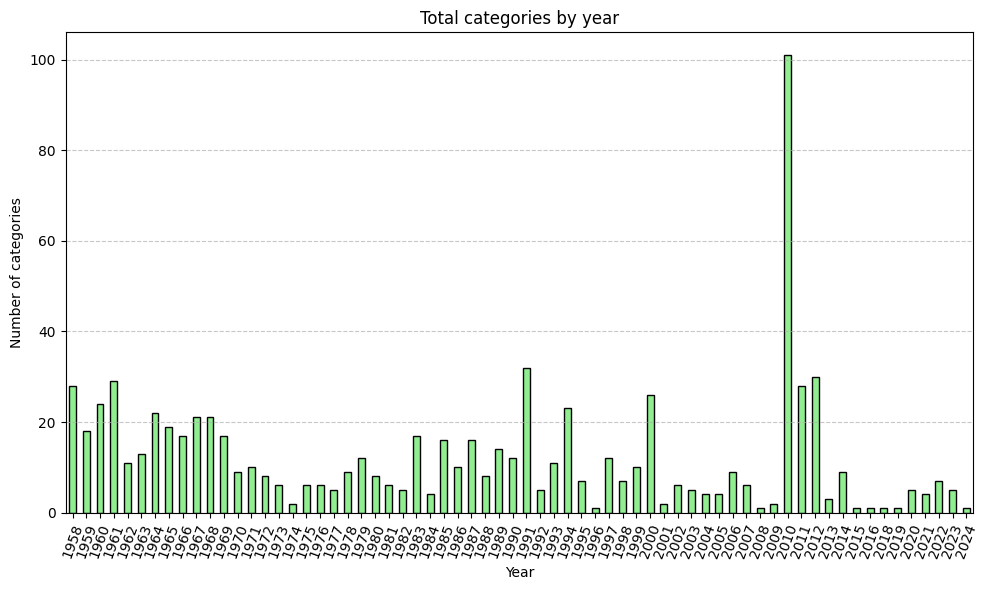

In [116]:
plt.figure(figsize=(10, 6))
category_by_year.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Total categories by year')
plt.xlabel('Year')
plt.ylabel('Number of categories')
plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [117]:
# def check_string(value: str | None):
#     if value:
#         value = value.replace('\\"', '')
#         value = ' '.join(map(lambda x: x.strip(), value.split(' ')))
#         return value.strip()
#     return value

# df['song_or_album'] = df.artist.map(check_string)

In [118]:
# edition_to_correct = df[df.year == 67]
# for item in edition_to_correct.itertuples():
#     df.loc[item.Index, 'year'] = 2024

# edition_to_correct = df[df.year == 66]
# for item in edition_to_correct.itertuples():
#     df.loc[item.Index, 'year'] = 2023

# edition_to_correct = df[df.year == 65]
# for item in edition_to_correct.itertuples():
#     df.loc[item.Index, 'year'] = 2022

In [119]:
def annual_edition(value: str | None):
    if value:
        result = re.match(r'\d+', value)
        if result:
            return result.group()
    return value


df['annual_edition'] = df.subtitle.map(annual_edition)

In [120]:
df_to_print = df[['year', 'annual_edition', 'category', 'artist', 'song_or_album', 'winner', 'url']]

In [121]:
df_to_print = df_to_print.sort_values('year', ascending=False)

In [122]:
# df_to_print = df_to_print.query('year == 2010')

In [123]:
df_to_print.to_csv(TMP_DIR / 'grammy_winners.csv', index=False)

In [124]:
empty_artists = df_to_print.loc[(df_to_print.artist != '') & (df_to_print.song_or_album != ''), ['category', 'artist', 'year', 'url']]

In [125]:
empty_artists.to_csv(TMP_DIR / 'empty_grammy_winners.csv')

In [126]:
# empty_artists.drop_duplicates(['url'])[['url']].to_csv('empty_data_urls.csv', index=False)